In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes=True)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data_df = pd.read_csv('/content/drive/MyDrive/raw_house_data.csv')

In [4]:
data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6,"Mexican Tile, Wood",0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,NaN,NaN,"Dishwasher, Garbage Disposal, Refrigerator",5,"Natural Stone, Other: Rock",NaN
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",NaN
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5,"Carpet, Concrete",55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1,"Carpet, Ceramic Tile",43
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0,Ceramic Tile,NaN
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1,"Carpet, Ceramic Tile",NaN


In [5]:
data_df.columns

Index(['MLS', 'sold_price', 'zipcode', 'longitude', 'latitude', 'lot_acres',
       'taxes', 'year_built', 'bedrooms', 'bathrooms', 'sqrt_ft', 'garage',
       'kitchen_features', 'fireplaces', 'floor_covering', 'HOA'],
      dtype='object')

In [6]:
data_df.dtypes

,0
MLS,int64
sold_price,float64
zipcode,int64
longitude,float64
latitude,float64
lot_acres,float64
taxes,float64
year_built,int64
bedrooms,int64
bathrooms,float64


In [7]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MLS               5000 non-null   int64  
 1   sold_price        5000 non-null   float64
 2   zipcode           5000 non-null   int64  
 3   longitude         5000 non-null   float64
 4   latitude          5000 non-null   float64
 5   lot_acres         4990 non-null   float64
 6   taxes             5000 non-null   float64
 7   year_built        5000 non-null   int64  
 8   bedrooms          5000 non-null   int64  
 9   bathrooms         4994 non-null   float64
 10  sqrt_ft           4944 non-null   float64
 11  garage            4993 non-null   float64
 12  kitchen_features  4967 non-null   object 
 13  fireplaces        5000 non-null   object 
 14  floor_covering    4999 non-null   object 
 15  HOA               4438 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory 

In [8]:
data_df.shape

(5000, 16)

In [9]:
#data_df= data_df.dropna()
data_df.count()

,0
MLS,5000
sold_price,5000
zipcode,5000
longitude,5000
latitude,5000
lot_acres,4990
taxes,5000
year_built,5000
bedrooms,5000
bathrooms,4994


In [10]:
data_df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,10
taxes,0
year_built,0
bedrooms,0
bathrooms,6


In [11]:
# conversion
data_df['bathrooms'] = pd.to_numeric(data_df['bathrooms'], errors='coerce')
data_df['sqrt_ft'] = pd.to_numeric(data_df['sqrt_ft'], errors='coerce')
data_df['garage'] = pd.to_numeric(data_df['garage'], errors='coerce')
data_df['fireplaces'] = pd.to_numeric(data_df['fireplaces'], errors='coerce')
data_df['HOA'] = pd.to_numeric(data_df['HOA'], errors='coerce')


In [12]:
# Handle missing values
data_df['bathrooms'].fillna(data_df['bathrooms'].median(), inplace=True)
data_df['sqrt_ft'].fillna(data_df['sqrt_ft'].median(), inplace=True)
data_df['garage'].fillna(data_df['garage'].median(), inplace=True)
data_df['fireplaces'].fillna(data_df['fireplaces'].median(), inplace=True)
data_df['lot_acres'].fillna(data_df['lot_acres'].median(), inplace=True)
data_df['kitchen_features'].fillna(data_df['kitchen_features'].mode()[0], inplace=True)
data_df['floor_covering'].fillna(data_df['floor_covering'].mode()[0], inplace=True)
data_df['HOA'].fillna(0, inplace=True)

<ipython-input-12-f701eea1a581>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_df['bathrooms'].fillna(data_df['bathrooms'].median(), inplace=True)
<ipython-input-12-f701eea1a581>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [13]:
numeric_columns = data_df.select_dtypes(include=[np.number]).columns

In [14]:
cleaned_dataset = data_df[numeric_columns].copy()

In [15]:
data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,0.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.0


In [16]:
data_df = data_df.drop_duplicates()

In [17]:
data_df.duplicated().sum()

0

In [18]:
data_df.shape

(5000, 16)

In [19]:
data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,"Dishwasher, Freezer, Refrigerator, Oven",6.0,"Mexican Tile, Wood",0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,"Dishwasher, Garbage Disposal",5.0,"Natural Stone, Other",0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator",5.0,"Natural Stone, Other: Rock",0.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4.0,"Ceramic Tile, Laminate, Wood",0.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,"Dishwasher, Garbage Disposal, Refrigerator, Mi...",5.0,"Carpet, Concrete",55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,"Dishwasher, Double Sink, Electric Range, Garba...",1.0,"Carpet, Ceramic Tile",43.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,"Dishwasher, Electric Range, Island, Refrigerat...",0.0,Ceramic Tile,0.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,"Dishwasher, Double Sink, Garbage Disposal, Gas...",1.0,"Carpet, Ceramic Tile",0.0


In [20]:
data_df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0


In [21]:
cleaned_dataset.to_csv('/content/drive/MyDrive/Cleaned_data.csv', index=False)

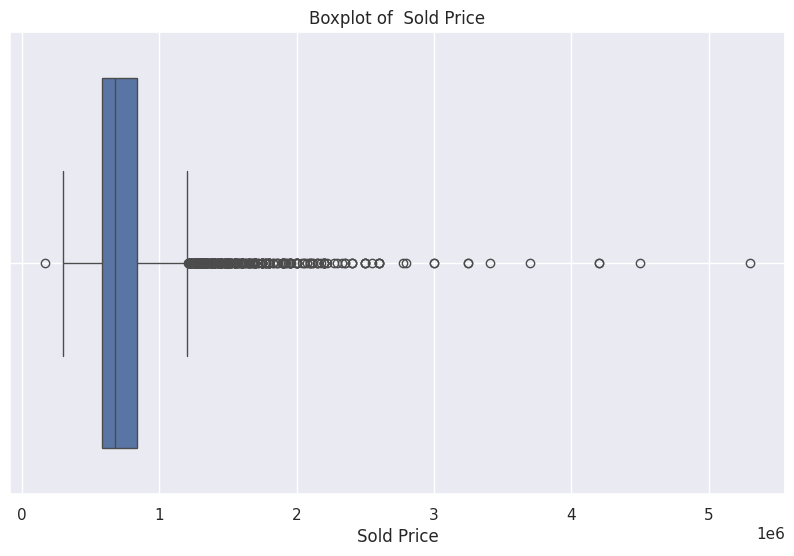

In [22]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data_df['sold_price'])
plt.title('Boxplot of  Sold Price')
plt.xlabel('Sold Price')
plt.grid(True)
plt.show()

In [23]:
#Identifying outliers numerically using IQR method

Q1 = data_df['sold_price'].quantile(0.25)
Q3 = data_df['sold_price'].quantile(0.75)
IQR = Q3 - Q1

In [24]:
print(IQR)

250000.0


<Axes: xlabel='sold_price'>

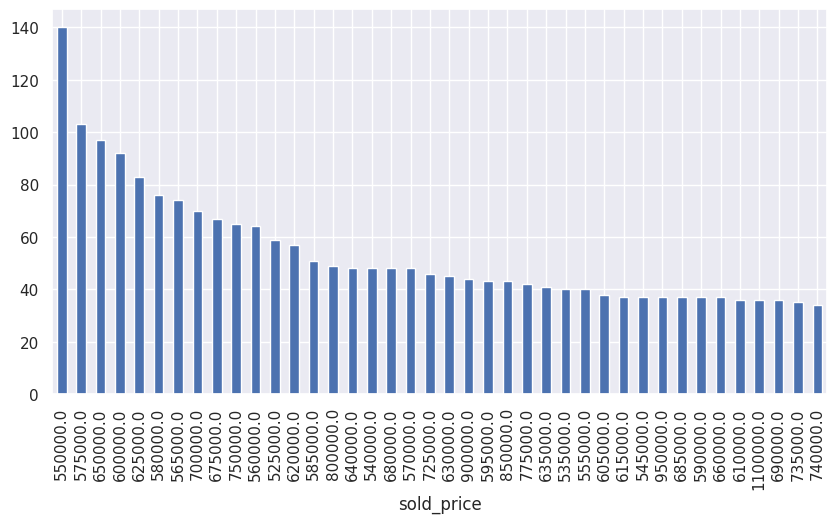

In [25]:
data_df.sold_price.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))

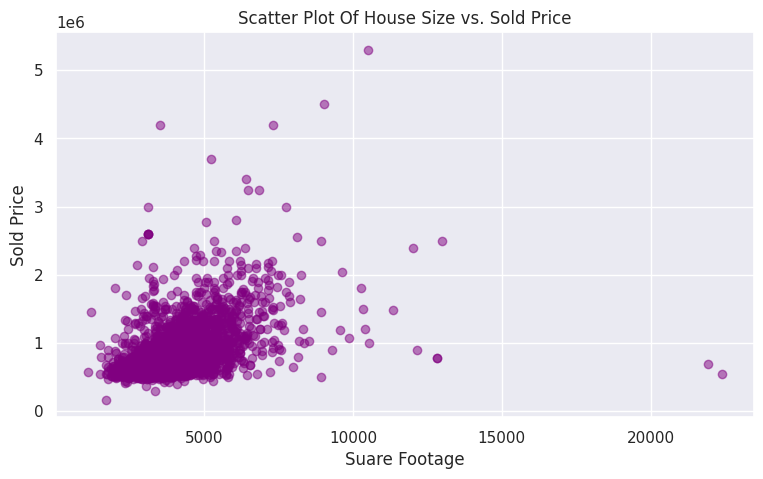

In [26]:
plt.figure(figsize=(9,5))
plt.scatter(data_df['sqrt_ft'],data_df['sold_price'], alpha=0.5, color='purple')
plt.title('Scatter Plot Of House Size vs. Sold Price')
plt.xlabel('Suare Footage')
plt.ylabel('Sold Price')
plt.grid(True)
plt.show()

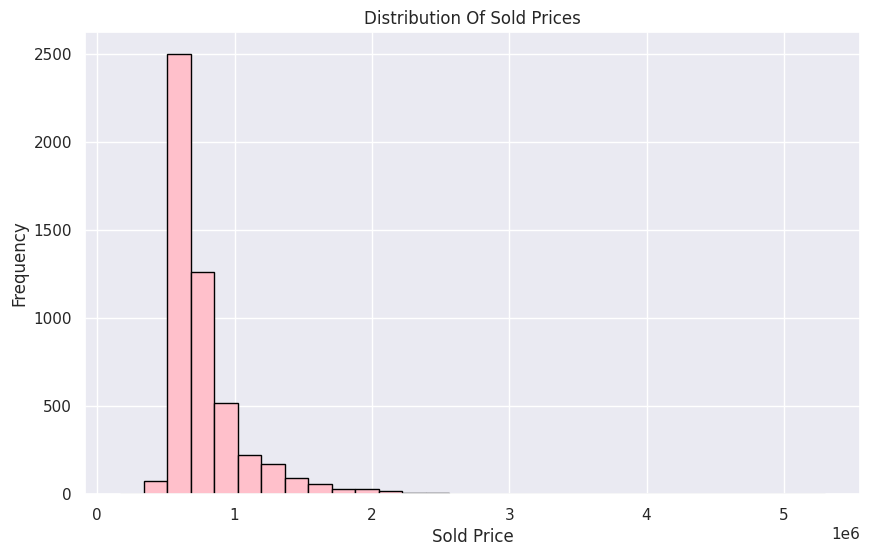

In [27]:
plt.figure(figsize=(10,6))
plt.hist(data_df['sold_price'], bins=30, color='pink', edgecolor= 'black' )
plt.title('Distribution Of Sold Prices')
plt.xlabel('Sold Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

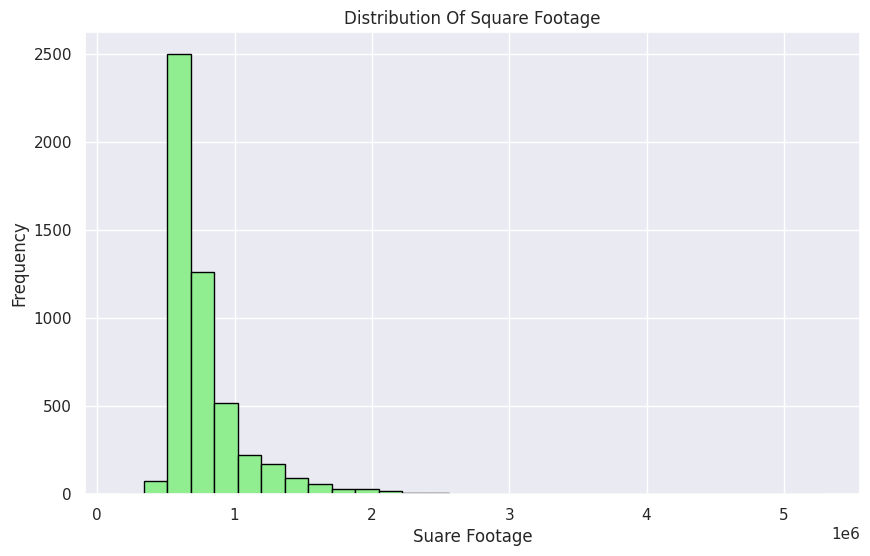

In [28]:
plt.figure(figsize=(10,6))
plt.hist(data_df['sold_price'], bins=30, color='lightgreen', edgecolor= 'black' )
plt.title('Distribution Of Square Footage')
plt.xlabel('Suare Footage')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

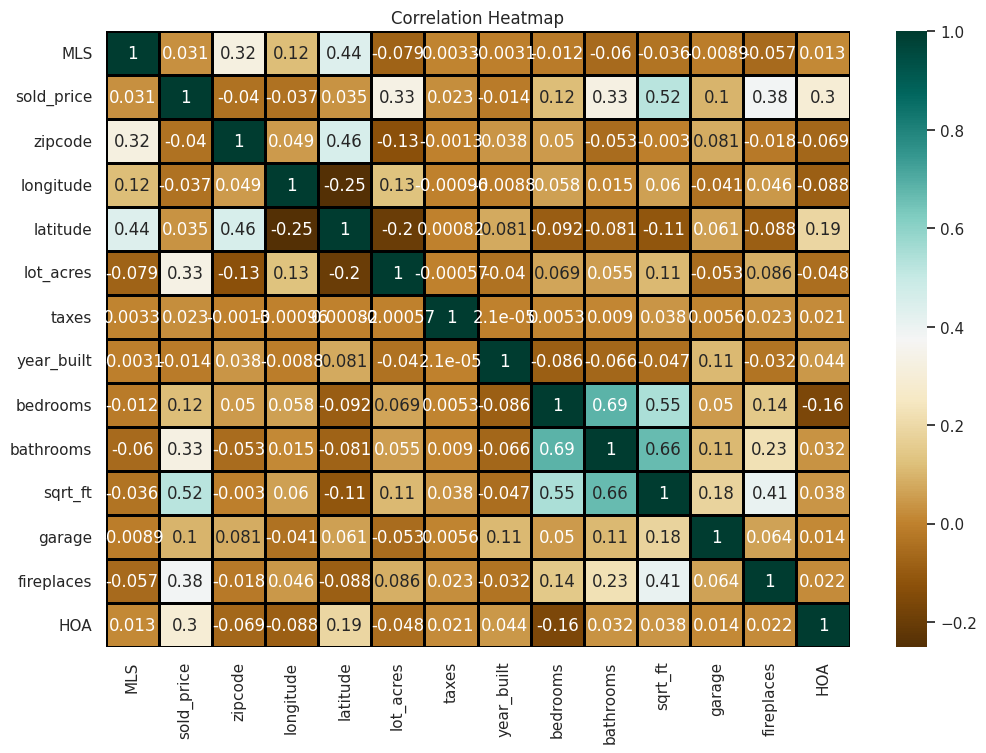

In [29]:
# Select only numeric columns
numeric_df = data_df.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, cmap="BrBG", annot =True, linewidths=1, linecolor='black')
plt.title('Correlation Heatmap')
plt.show()

In [30]:
data_df = cleaned_dataset

In [31]:
data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6.0,0.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5.0,0.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,5.0,0.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4.0,0.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,1.0,0.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,1.0,43.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,0.0,0.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,1.0,0.0


In [32]:
data_df.isnull().sum()

,0
MLS,0
sold_price,0
zipcode,0
longitude,0
latitude,0
lot_acres,0
taxes,0
year_built,0
bedrooms,0
bathrooms,0


In [33]:
# Calculate price per sqft
data_df['price_per_sqft'] = data_df['sold_price'] / data_df['sqrt_ft']

In [34]:
# Create 20 bins for Price per sqft and assign categories as labels
data_df['price_category'] = pd.qcut(data_df['price_per_sqft'], 20, labels = False)

In [35]:
data_df['price_category']

,price_category
0,19
1,19
2,19
3,19
4,19
...,...
4995,0
4996,15
4997,17
4998,1


# KNN Classifier

In [36]:
# Prepare the feature matrix
X_knn = data_df[['latitude', 'longitude']].copy().to_numpy()
y_knn = data_df['price_category'].copy().to_numpy()

In [37]:
print(X_knn)

[[  31.356362 -110.3782  ]
 [  31.594213 -111.045371]
 [  31.594844 -111.040707]
 ...
 [  32.964708 -110.755428]
 [  32.296871 -111.055528]
 [  31.385259 -110.913054]]


In [38]:
print("Target of KNNClassifier:", y_knn)

Target of KNNClassifier: [19 19 19 ... 17  1  0]


In [39]:
class KNNClassifier:
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K=3, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X - X[i]) ** 2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1 / (np.sqrt(dist2[idxt] + epsilon))
            y_hat[i] = np.bincount(self.y[idxt].astype(int), weights=gamma_k).argmax()

        return y_hat


KNN = KNNClassifier()

KNN.fit(X_knn,y_knn)

y_hat_knn = KNN.predict(X_knn, K=2)

data_df['knn_price_cat'] = y_hat_knn #knn wts, use this to predict

In [40]:
data_df

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,fireplaces,HOA,price_per_sqft,price_category,knn_price_cat
0,21530491,5300000.0,85637,-110.378200,31.356362,2154.00,5272.00,1941,13,10.0,10500.0,0.0,6.0,0.0,504.761905,19,19.0
1,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0.0,5.0,0.0,575.342466,19,19.0
2,3054672,4200000.0,85646,-111.040707,31.594844,1707.00,10482.00,1997,2,3.0,3512.0,3.0,5.0,0.0,1195.899772,19,19.0
3,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4.0,4.0,0.0,498.946668,19,19.0
4,21306357,3411450.0,85750,-110.813768,32.285162,3.21,15393.00,1995,4,6.0,6396.0,3.0,5.0,55.0,533.372420,19,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,21810382,495000.0,85641,-110.661829,31.907917,4.98,2017.00,2005,5,3.0,3601.0,3.0,1.0,0.0,137.461816,0,0.0
4996,21908591,550000.0,85750,-110.858556,32.316373,1.42,4822.01,1990,4,3.0,2318.0,3.0,1.0,43.0,237.273512,15,15.0
4997,21832452,475000.0,85192,-110.755428,32.964708,12.06,1000.00,1969,3,2.0,1772.0,0.0,0.0,0.0,268.058691,17,17.0
4998,21900515,550000.0,85745,-111.055528,32.296871,1.01,5822.93,2009,4,4.0,3724.0,3.0,1.0,0.0,147.690655,1,1.0


In [41]:
# Calculate accuracy
def accuracy(y,y_hat):
  return np.mean(y=y_hat)

In [42]:
accuracy = np.mean(y_hat_knn==y_knn)
accuracy

0.9898

#### Scatter Plot for KNN Classifier

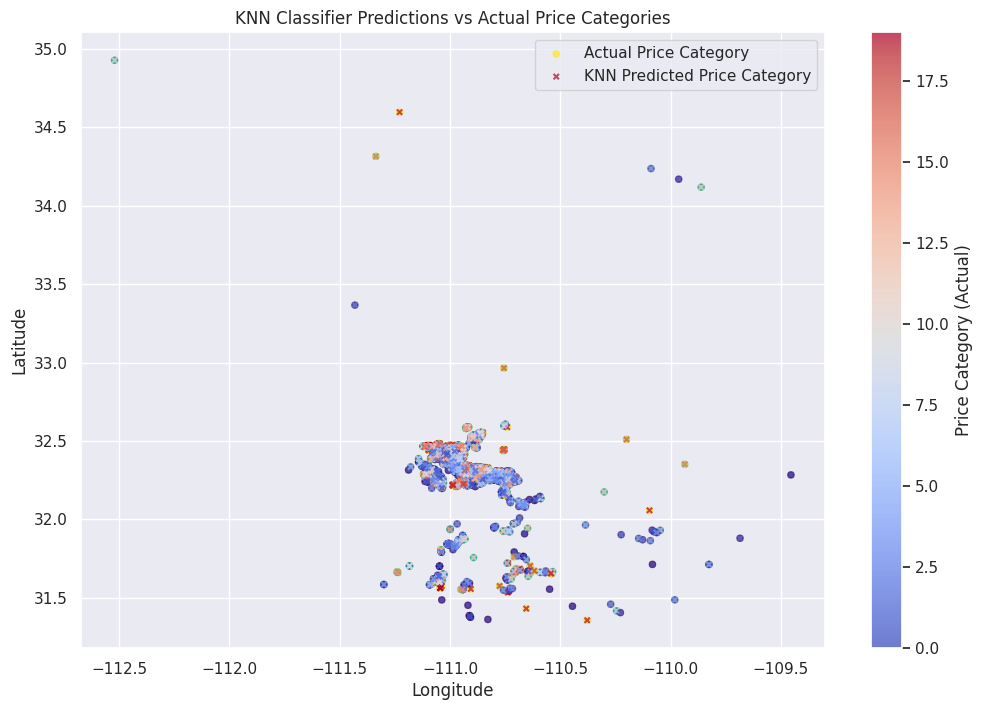

In [43]:
plt.figure(figsize=(12, 8))
plt.scatter(X_knn[:, 1], X_knn[:, 0], c=y_knn, cmap='viridis', marker='o', s=20, label='Actual Price Category', alpha=0.7)
plt.scatter(X_knn[:, 1], X_knn[:, 0], c=y_hat_knn, cmap='coolwarm', marker='x', s=15, label='KNN Predicted Price Category', alpha=0.7)
cbar_actual = plt.colorbar(label='Price Category (Actual)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('KNN Classifier Predictions vs Actual Price Categories')
plt.legend(loc='upper right')
plt.show()

In [44]:
data_df['bedrooms'].value_counts()

,count
bedrooms,
4,2388
3,1406
5,869
2,164
6,114
7,32
8,8
1,4
9,3


# Regression with Gradient Descent

In [45]:
data_df['rooms'] = data_df['bedrooms'] + data_df['bathrooms']

In [46]:
data_df[['bedrooms', 'bathrooms', 'rooms','sold_price']]

,bedrooms,bathrooms,rooms,sold_price
0,13,10.0,23.0,5300000.0
1,2,2.0,4.0,4200000.0
2,2,3.0,5.0,4200000.0
3,7,5.0,12.0,4500000.0
4,4,6.0,10.0,3411450.0
...,...,...,...,...
4995,5,3.0,8.0,495000.0
4996,4,3.0,7.0,550000.0
4997,3,2.0,5.0,475000.0
4998,4,4.0,8.0,550000.0


In [47]:
#required columns for regression
# columns = ['knn_price_cat', 'sqrt_ft', 'lot_acres', 'fireplaces', 'garage', 'rooms']
columns = ['knn_price_cat', 'sqrt_ft', 'lot_acres', 'fireplaces', 'garage', 'rooms']
X_reg = data_df[columns].to_numpy()
y_reg = data_df['sold_price'].to_numpy()

In [48]:
#scale column for standardization using numpy

X_scale = (X_reg - np.mean(X_reg, axis=0)) / np.std(X_reg, axis=0)
y_scale = (y_reg -np.mean(y_reg)) / np.std(y_reg)

In [49]:
def MAE(Y,Y_hat):
  # return np.sum(np.abs((Y-Y_hat)/Y))
  return np.mean(np.abs(Y-Y_hat))

def R2(Y,Y_hat):
  N= len(Y)
  return 1-((np.sum((Y-Y_hat)**2)/np.sum((Y_hat-np.mean(Y))**2)))

def OLS(Y, Y_hat, N):
  return ((1/(2*N))*np.sum((Y-Y_hat)**2))

#### OLS Multivariate Linear Regression Class

In [50]:
class MVLinearRegression():

  def fit(self, X, y, eta= 1e-3, epochs=1e3, show_curve=False):
    epochs = int(epochs)
    N, D = X.shape
    Y=y

    #Begin Optimization
    self.W = np.random.randn(D)
    self.J = np.zeros(epochs)

    #Stochastic Gradient Descent
    for epoch in range(epochs):
      Y_hat = self.predict(X)
      self.J[epoch] = OLS(Y, Y_hat, N)
      #Weight Update Rule
      self.W -= eta*(1/N)*(X.T@(Y_hat-Y))

    if show_curve:
      plt.figure()
      plt.plot(self.J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")

  def predict(self, X):
    return X@self.W

#### Loss Curve: For linear regression

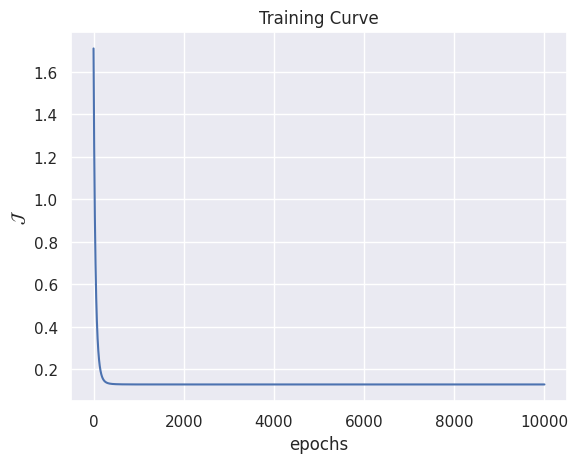

In [51]:
my_reg = MVLinearRegression()
my_reg.fit(X_scale,y_scale, eta=1e-2, epochs=1e4, show_curve=True)

In [52]:
y_hat_sacle = my_reg.predict(X_scale)

In [53]:
#Actual prediction by removing scale
y_hat_reg = (y_hat_sacle * np.std(y_reg)) + np.mean(y_reg)

#### Scatter Plot: Actual vs. Predicted Sold Prices for both models


#### Residual Plot: Residuals for each model

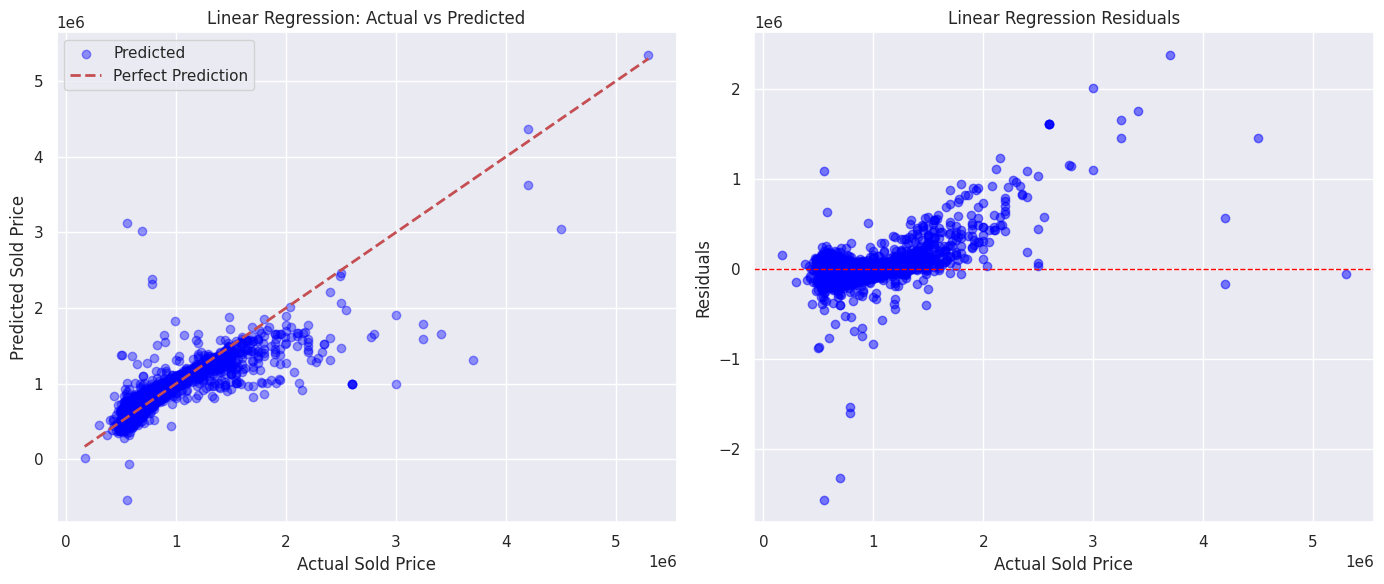

In [54]:
plt.figure(figsize=(14, 6))

# Linear Regression: Actual vs. Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_reg, y_hat_reg, alpha=0.4, color='blue', label="Predicted")
plt.plot([min(y_reg), max(y_reg)], [min(y_reg), max(y_reg)], 'r--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Sold Price")
plt.ylabel("Predicted Sold Price")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend(loc="upper left")
plt.grid(True)


# Linear Regression Residuals
plt.subplot(1, 2, 2)
residuals_lr = y_reg - y_hat_reg
plt.scatter(y_reg, residuals_lr, alpha=0.5, color='blue')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Actual Sold Price")
plt.ylabel("Residuals")
plt.title("Linear Regression Residuals")
plt.grid(True)

plt.tight_layout()
plt.show()

In [55]:
print("R2 for MVLinear Regression:", R2(y_reg,y_hat_reg))
print("MAE for MVLinear Regression:", MAE(y_reg,y_hat_reg))

R2 for MVLinear Regression: 0.6516615973965773
MAE for MVLinear Regression: 84026.6519990779


## KNN Regressor

In [56]:
# KNN Regressor Class
class KNNRegressor():
    def fit(self, X, y):
        self.X = X
        self.y = y

    def predict(self, X, K, epsilon=1e-3):
        N = len(X)
        y_hat = np.zeros(N)

        for i in range(N):
            dist2 = np.sum((self.X - X[i]) ** 2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = np.exp(-dist2[idxt]) / (np.exp(-dist2[idxt]).sum() + epsilon)
            y_hat[i] = gamma_k.dot(self.y[idxt])

        return y_hat

In [57]:
knnr = KNNRegressor()
knnr.fit(X_scale, y_scale)

In [58]:
y_hat_knn_scale = knnr.predict(X_scale, K=2)
y_hat_knn_reg = (y_hat_knn_scale * np.std(y_reg)) + np.mean(y_reg)

In [59]:
y_hat_knn_reg

array([5295479.14705521, 4196578.04820326, 4196578.04820326, ...,
        520193.06313769,  540123.02344918,  534496.94616213])

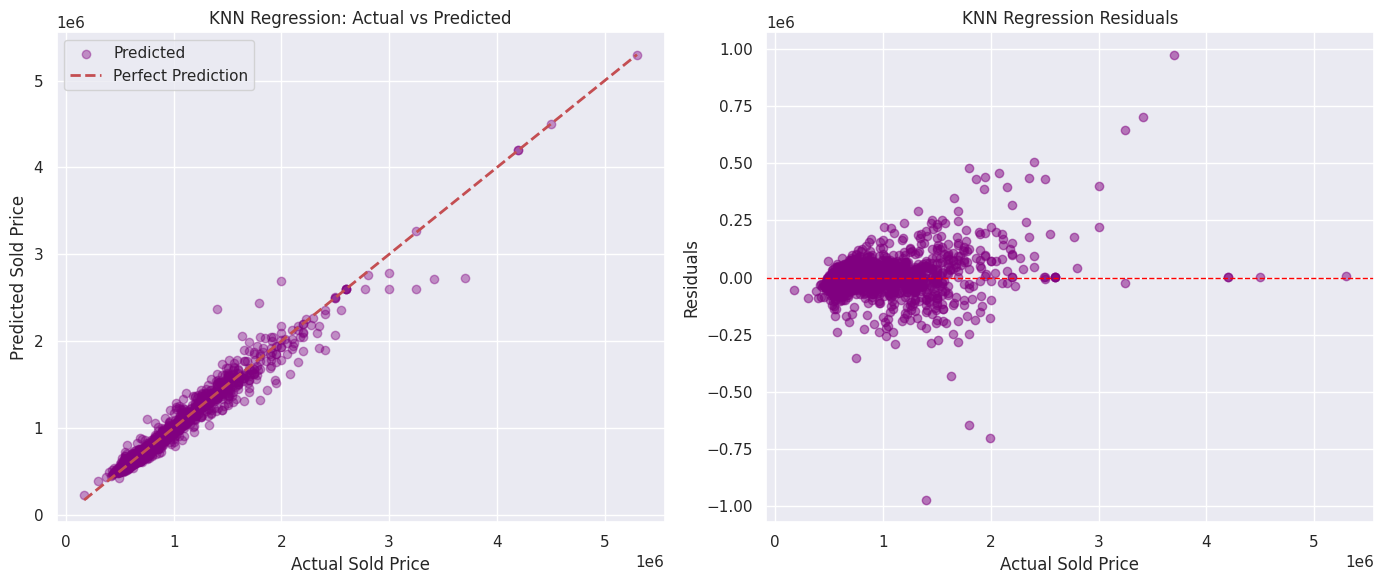

In [60]:
plt.figure(figsize=(14, 6))
# KNN Regression: Actual vs. Predicted
plt.subplot(1, 2, 1)
plt.scatter(y_reg, y_hat_knn_reg, alpha=0.4, color='purple', label="Predicted")
plt.plot([min(y_reg), max(y_reg)], [min(y_reg), max(y_reg)], 'r--', linewidth=2, label="Perfect Prediction")
plt.xlabel("Actual Sold Price")
plt.ylabel("Predicted Sold Price")
plt.title("KNN Regression: Actual vs Predicted")
plt.legend(loc="upper left")
plt.grid(True)

# KNN Regression Residuals
plt.subplot(1, 2, 2)
residuals_knn = y_reg - y_hat_knn_reg
plt.scatter(y_reg, residuals_knn, alpha=0.5, color='purple')
plt.axhline(y=0, color='red', linestyle='--', linewidth=1)
plt.xlabel("Actual Sold Price")
plt.ylabel("Residuals")
plt.title("KNN Regression Residuals")
plt.grid(True)

plt.tight_layout()
plt.show()

In [61]:
print("R2 for KNN Regression:", R2(y_reg, y_hat_knn_reg))
print("MAE for KNN Regression:", MAE(y_reg, y_hat_knn_reg))

R2 for KNN Regression: 0.9712513649377034
MAE for KNN Regression: 23191.808753812038


# Execute In Presentation

In [65]:
# selected_columns = ['knn_price_cat', 'latitude', 'longitude', 'bedrooms']
selected_columns = ['knn_price_cat', 'zipcode', 'bedrooms']
X_reg_new = data_df[selected_columns].to_numpy()
y_reg = data_df['sold_price'].to_numpy()

# Scaling
X_scale_new = (X_reg_new - np.mean(X_reg_new, axis=0)) / np.std(X_reg_new, axis=0)
y_scale = (y_reg - np.mean(y_reg)) / np.std(y_reg)

knnr_live = KNNRegressor()
knnr_live.fit(X_scale_new, y_scale)

In [70]:
def predict_price(bedrooms, zipcode):

    knn_price_cat = 0
    # features = [knn_price_cat, latitude, longitude, bedrooms]
    features = [knn_price_cat, zipcode, bedrooms]

    features_scaled = (np.array(features) - np.mean(X_reg_new, axis=0)) / np.std(X_reg_new, axis=0)

    price_knn_scaled = knnr_live.predict(features_scaled.reshape(1, -1), K=3)
    price_knn = (price_knn_scaled * np.std(y_reg)) + np.mean(y_reg)

    print(f"Predicted Price using KNN Regression: ${price_knn[0]:,.2f}")

In [71]:
# predict_price(bedrooms=36, latitude=31.701407, longitude=-111.04726)
# predict_price(bedrooms=19, latitude=32.253627, longitude=-110.799667)
predict_price(bedrooms=19, zipcode=85749)


Predicted Price using KNN Regression: $894,879.97
